# Blinkit Data Analysis

### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1. Load Dataset

In [7]:
df = pd.read_excel("BlinkIT Grocery Data.xlsx")

### Describe Category/Numerical/Mix/Other Columns
- Categorical Columns : Item Fat Content, Item Type, Outlet Location Type, Outlet Size, Outlet Type
- Numerical Columns   : Item Visibility, Item Weight, Sales, Rating
- Date Columns        : Outlet Establishment Year
- Mix Columns         : Item Identifier, Outlet Identifier
- Other Columns       : ---

### 2. Data Inspection

In [10]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [11]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [12]:
df.sample(3)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
6673,Low Fat,NCS06,Household,2016,OUT046,Tier 1,Small,Supermarket Type1,0.000000,7.935,263.6910,4.0
2513,Regular,FDD32,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.040898,17.700,82.6276,4.2
198,Low Fat,NCM53,Health and Hygiene,2020,OUT017,Tier 2,Small,Supermarket Type1,0.052335,18.750,108.1280,5.0


In [13]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 3. Data Cleaning

### A. Column Edits :
1. Rename Column --> Format : ColumnName
2. Correct Dtype --> Correct DataType
3. Drop Columns  --> If column not needed drop it --> syntax : df.drop(columns = [ 'columnname1' , 'columnname2' ])

### B. Missing Values :
1. Check Missing Values : df.isnull().sum()
2. Handling Missing Values : Removing Missing Values / Filling Missing Values / Interpolation

##### 1. Removing Missing Values
    - syntax : df_cleaned = df.dropna()           # Drop Rows with Missing Values
    - syntax : df_cleaned = df.dropna(axis = 1)   # Drop Columns with Missing Values


##### 2. Filling Missing Values
    - syntax : df['column_name'] = df['column_name'].fillna(0)  # Replace with zero

    - syntax : df['column_name'] = df['column_name'].fillna(df['column_name'].mean())  # Mean
    - syntax : df['column_name'] = df['column_name'].fillna(df['column_name'].median())  # Median
    - syntax : df['column_name'] = df['column_name'].fillna(df['column_name'].mode()[0])  # Mode

    - syntax : df['column_name'] = df['column_name'].fillna(method='ffill')  # Forward fill
    - syntax : df['column_name'] = df['column_name'].fillna(method='bfill')  # Backward fill

##### 3. Interpolation
    - syntax : df['column_name'] = df['column_name'].interpolate()   # This method estimates the missing values based on other available data points

In [18]:
# A. Column Edits :
# 1. Rename Column --> Format : column_name
df.rename(columns={
    "Item Fat Content" : "item_fat_content",
    "Item Identifier"	: "item_identifier",
    "Item Type" : "item_type",
    "Outlet Establishment Year" : "outlet_establishment_year",
    "Outlet Identifier" : "outlet_identifier",
    "Outlet Location Type" : "outlet_location_type",
    "Outlet Size" : "outlet_size",
    "Outlet Type" : "outlet_type",
    "Item Visibility" : "item_visibility",
    "Item Weight" : "item_weight_sales",
    "Sales" : "sales",
    "Rating" : "rating"
}, inplace = True
         )

In [19]:
df.head()

,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight_sales,sales,rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [20]:
# 2. Correct Dtype --> Correct DataType

### Data Types in pandas
# int64: Integer values.
# float64: Floating-point numbers (decimals).
# object: Typically used for string values or mixed types.
# bool: Boolean values (True/False).
# datetime64: Date and time values.
# category: Categorical data, which can be ordered or unordered.

In [21]:
# int64      : ---
# float64    : Item Visibility, Item Weight, Sales, Rating
# object     : Item Identifier, Outlet Identifier
# bool       : ---
# datetime64 : Outlet Establishment Year
# category   : Item Fat Content, Item Type, Outlet Location Type, Outlet Size, Outlet Type

# NO Change Needed Columns : Item Identifier, Outlet Identifier

# Change Needed Columns    : Item Fat Content, Item Type, Outlet Location Type, Outlet Size, Outlet Type

In [22]:
df.dtypes

item_fat_content              object
item_identifier               object
item_type                     object
outlet_establishment_year      int64
outlet_identifier             object
outlet_location_type          object
outlet_size                   object
outlet_type                   object
item_visibility              float64
item_weight_sales            float64
sales                        float64
rating                       float64
dtype: object

In [23]:
# 3. Change dtype

# Change Needed Columns    : Item Fat Content, Item Type, Outlet Location Type, Outlet Size, Outlet Type

# syntax :
#         1. df['ColumnName'].astype('int64') --> for all dtype [ int64, float64, object, bool, category ]
#         2. pd.to_datetime(df['ColumnName'], errors = 'coerce')

In [24]:
df['item_fat_content'] = df['item_fat_content'].astype('category')
df['item_type'] = df['item_type'].astype('category')
df['outlet_location_type'] = df['outlet_location_type'].astype('category')
df['outlet_type'] = df['outlet_type'].astype('category')

In [25]:
df.dtypes

item_fat_content             category
item_identifier                object
item_type                    category
outlet_establishment_year       int64
outlet_identifier              object
outlet_location_type         category
outlet_size                    object
outlet_type                  category
item_visibility               float64
item_weight_sales             float64
sales                         float64
rating                        float64
dtype: object

In [26]:
df.head()

,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight_sales,sales,rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### B. Missing Values :
##### a. Check Missing Values : df.isnull().sum()
##### b. Handling Missing Values : Removing Missing Values / Filling Missing Values / Interpolation
1. Removing Missing Values
    - syntax : df_cleaned = df.dropna()           # Drop Rows with Missing Values
    - syntax : df_cleaned = df.dropna(axis = 1)   # Drop Columns with Missing Values

2. Filling Missing Values
    - syntax : df['column_name'] = df['column_name'].fillna(0)  # Replace with zero
    
    - syntax : df['column_name'] = df['column_name'].fillna(df['column_name'].mean())  # Mean
    - syntax : df['column_name'] = df['column_name'].fillna(df['column_name'].median())  # Median
    - syntax : df['column_name'] = df['column_name'].fillna(df['column_name'].mode()[0])  # Mode
    
    - syntax : df['column_name'] = df['column_name'].fillna(method='ffill')  # Forward fill
    - syntax : df['column_name'] = df['column_name'].fillna(method='bfill')  # Backward fill

3. Interpolation
    
- syntax : df['column_name'] = df['column_name'].interpolate()   # This method estimates the missing values based on other available data points

In [28]:
# a. Check Missing Values : df.isnull().sum()
df.isnull().sum()

item_fat_content                0
item_identifier                 0
item_type                       0
outlet_establishment_year       0
outlet_identifier               0
outlet_location_type            0
outlet_size                     0
outlet_type                     0
item_visibility                 0
item_weight_sales            1463
sales                           0
rating                          0
dtype: int64

In [29]:
# b. Filling Missing Values
df['item_weight_sales'] = df['item_weight_sales'].fillna("Unknown")

In [30]:
df[(df=="Unknown").any(axis=1)]

,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight_sales,sales,rating
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,Unknown,181.9292,5.0
10,LF,FDX21,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.084555,Unknown,109.8912,5.0
14,Low Fat,FDH19,Meat,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.032928,Unknown,173.1738,5.0
18,Low Fat,FDJ56,Fruits and Vegetables,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.182515,Unknown,98.7700,5.0
20,Regular,FDZ07,Fruits and Vegetables,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,Unknown,60.2194,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,Unknown,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,Unknown,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,Unknown,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,Unknown,97.8752,4.0


In [31]:
df.head()

,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight_sales,sales,rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.6,55.1614,5.0


In [32]:
df['item_fat_content'] = df['item_fat_content'].replace({
    "LF" : "Low Fat",
    "Low Fat" : "Low Fat",
    "Regular" : "Regular",
    "low fat" : "Low Fat",
    "reg" : "Regular"
})

### 4. EDA

#### 1. What is the relationship between item type and sales?

item_type
Baking Goods              81894.7364
Breads                    35379.1198
Breakfast                 15596.6966
Canned                    90706.7290
Dairy                    101276.4616
Frozen Foods             118558.8814
Fruits and Vegetables    178124.0810
Hard Drinks               29334.6806
Health and Hygiene        68025.8388
Household                135976.5254
Meat                      59449.8638
Others                    22451.8916
Seafood                    9077.8700
Snack Foods              175433.9224
Soft Drinks               58514.1670
Starchy Foods             21880.0274
Name: sales, dtype: float64


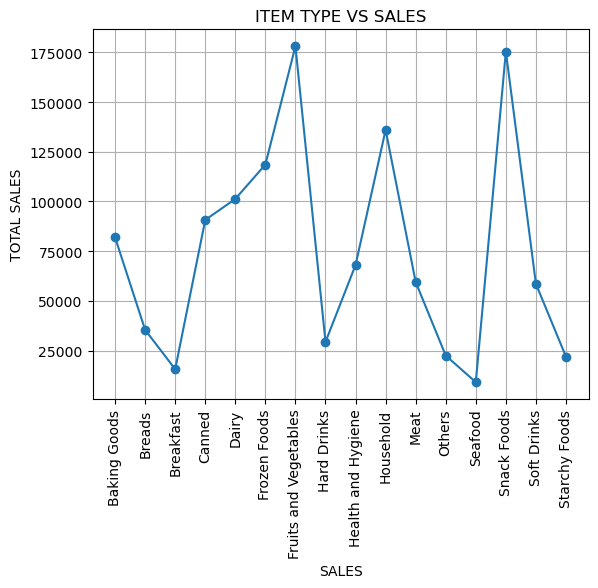

In [282]:
group_df = df.groupby('item_type')['sales'].sum()
print(group_df)

plt.plot(group_df.index, group_df.values, label="sales", marker='o')
plt.xticks(rotation=90)

plt.title("ITEM TYPE VS SALES")
plt.xlabel("SALES")
plt.ylabel("TOTAL SALES")

plt.grid()

plt.show()

#### Answer : 
The analysis of sales by item type reveals significant variations across categories. Fruits and Vegetables recorded the highest sales at ₹178,124.08, while Seafood had the lowest at ₹9,077.87. The average sales across all item types stand at approximately ₹75,000, highlighting the diverse consumer preferences and market demand for different food categories.

#### 2. How does outlet location type influence total sales?

outlet_location_type
Tier 1    336397.8120
Tier 2    393150.6476
Tier 3    472133.0332
Name: sales, dtype: float64


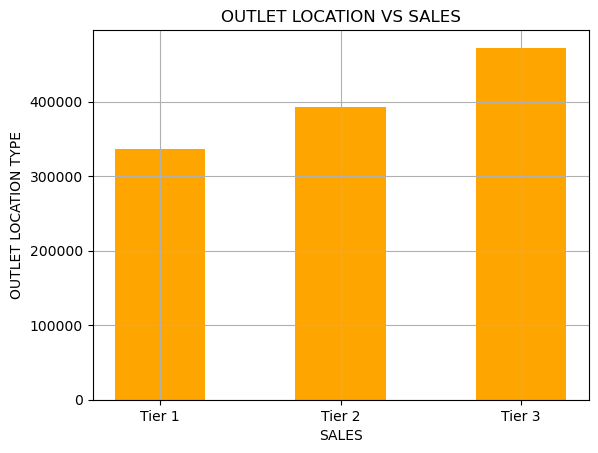

In [228]:
group_df = df.groupby("outlet_location_type")["sales"].sum()
print(group_df)

plt.bar(group_df.index,group_df.values, color="orange", width=0.5)

plt.title("OUTLET LOCATION VS SALES")
plt.xlabel("SALES")
plt.ylabel("OUTLET LOCATION TYPE")

plt.grid()

plt.show()

#### Answer : 
The analysis of total sales by outlet location type shows a clear influence of location on sales performance. Tier 3 outlets generated the highest sales, averaging ₹472,133.03, followed by Tier 2 at ₹393,150.65, and Tier 1 at ₹336,397.81. This trend indicates that outlet location significantly impacts customer purchasing behavior and sales volume.

#### 3. What is the impact of outlet size on sales figures?

outlet_size
High      248991.5860
Medium    507895.7364
Small     444794.1704
Name: sales, dtype: float64


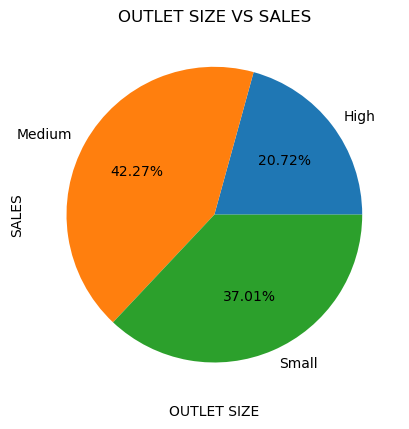

In [226]:
group_df = df.groupby("outlet_size")["sales"].sum()
print(group_df)

plt.pie(group_df.values, labels=group_df.index, autopct="%1.2f%%")

plt.title("OUTLET SIZE VS SALES")
plt.xlabel("OUTLET SIZE")
plt.ylabel("SALES")

plt.show()

#### Answer : 
The impact of outlet size on sales figures reveals notable differences in performance. Medium-sized outlets achieved the highest sales, averaging ₹507,895.74, followed by small outlets at ₹444,794.17, while high-sized outlets recorded the lowest sales at ₹248,991.59. This indicates that medium outlets may be more effective in attracting customers and driving sales.

#### 4. What trends can be observed in sales over the years since the outlet was established?

outlet_establishment_year
2011     78131.5666
2012    130476.8598
2014    131809.0156
2015    130942.7802
2016    132113.3698
2017    133103.9070
2018    204522.2570
2020    129103.9604
2022    131477.7764
Name: sales, dtype: float64


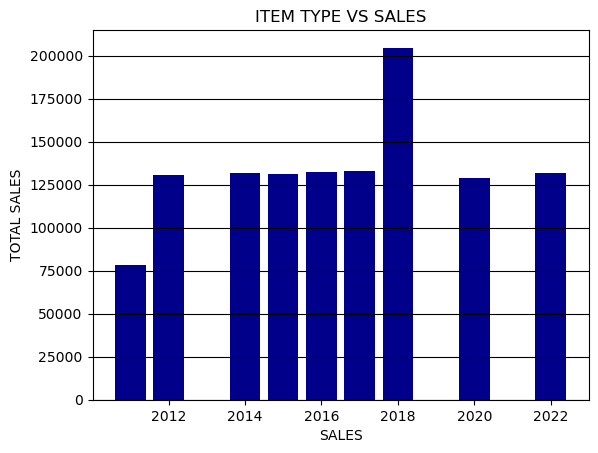

In [102]:
group_df = df.groupby("outlet_establishment_year")["sales"].sum()
print(group_df)

plt.bar(group_df.index, group_df.values, color="darkblue")

plt.title("ITEM TYPE VS SALES")
plt.xlabel("SALES")
plt.ylabel("TOTAL SALES")

plt.grid(axis="y", color="black")

plt.show()

#### Answer : 
The analysis of sales trends since the outlets were established indicates an overall increase in sales from 2011 to 2018, peaking at ₹204,522.26. However, sales then fluctuated, experiencing a decline in 2020 to ₹129,103.96 before recovering slightly to ₹131,477.78 in 2022, reflecting potential market challenges and recovery patterns.

#### 5. How does outlet type affect the number of items sold?

outlet_type      
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


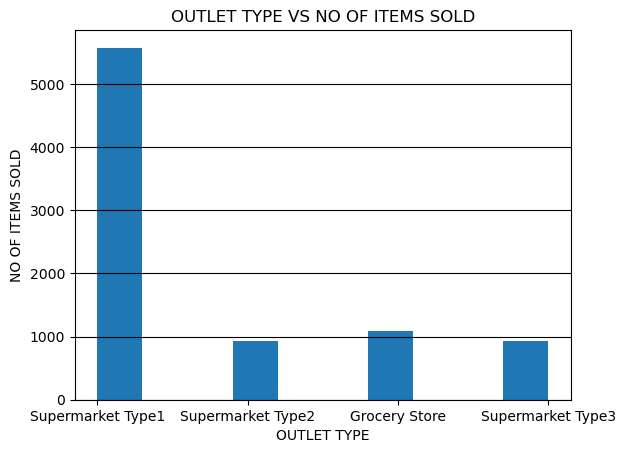

In [300]:
plt.hist(df['outlet_type'])
k = pd.DataFrame(df['outlet_type']).value_counts()
print(k)

plt.title("OUTLET TYPE VS NO OF ITEMS SOLD")
plt.xlabel("OUTLET TYPE")
plt.ylabel("NO OF ITEMS SOLD")

plt.grid(axis="y", color="black")

plt.show()

#### Answer : 
The analysis of outlet type reveals a significant impact on the number of items sold. Supermarket Type 1 dominates with 5,577 items sold, showcasing its effectiveness in attracting customers. In contrast, Grocery Stores sold 1,083 items, while Supermarket Type 3 and Type 2 sold 935 and 928 items, respectively, indicating varying performance across outlet types.

#### 6. What is the correlation between fat content and sales performance?

item_fat_content
Low Fat    776319.6884
Regular    425361.8044
Name: sales, dtype: float64


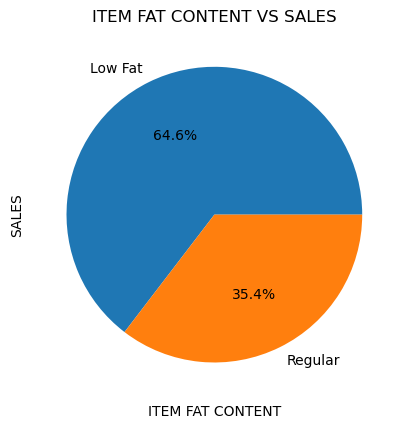

In [302]:
group = df.groupby(df['item_fat_content'])['sales'].sum()
print(group)

plt.pie(group, labels=group.index, autopct='%1.1f%%')

plt.title("ITEM FAT CONTENT VS SALES")
plt.xlabel("ITEM FAT CONTENT")
plt.ylabel("SALES")

plt.show()

#### Answer : 
The correlation between fat content and sales performance demonstrates a clear preference for low-fat products. Sales for low-fat items reached ₹776,319.69, significantly outpacing regular items, which sold for ₹425,361.80. This disparity suggests that consumers may prioritize healthier options, driving higher sales for low-fat products in the market.

## CONCLUSION : 
1. **Item Type and Sales**: Sales varied significantly across item types, with Fruits and Vegetables leading at ₹178,124.08, highlighting diverse consumer preferences and market demand.

2. **Outlet Location Type**: Sales performance increased with outlet tier level; Tier 3 outlets had the highest sales at ₹472,133.03, indicating location's strong influence on customer behavior.

3. **Outlet Size Impact**: Medium-sized outlets achieved the highest average sales at ₹507,895.74, suggesting they are most effective in attracting customers compared to small and high-sized outlets.

4. **Sales Trends Over Years**: Sales trends showed a peak in 2018 at ₹204,522.26, followed by fluctuations, including a decline in 2020, indicating market challenges and recovery patterns over time.

5. **Outlet Type and Items Sold**: Supermarket Type 1 significantly outperformed others with 5,577 items sold, reflecting its effectiveness compared to Grocery Stores and other supermarket types.

6. **Fat Content Correlation**: Low-fat products generated higher sales at ₹776,319.69 compared to regular items, suggesting a strong consumer preference for healthier options in the market.